In [202]:
import torch as pt
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8)
pt.manual_seed(42)


print('done')

done






ᵅ
α
β




In [203]:
X = pt.linspace(-5,5,50)
X

tensor([-5.0000, -4.7959, -4.5918, -4.3878, -4.1837, -3.9796, -3.7755, -3.5714,
        -3.3673, -3.1633, -2.9592, -2.7551, -2.5510, -2.3469, -2.1429, -1.9388,
        -1.7347, -1.5306, -1.3265, -1.1224, -0.9184, -0.7143, -0.5102, -0.3061,
        -0.1020,  0.1020,  0.3061,  0.5102,  0.7143,  0.9184,  1.1224,  1.3265,
         1.5306,  1.7347,  1.9388,  2.1429,  2.3469,  2.5510,  2.7551,  2.9592,
         3.1633,  3.3673,  3.5714,  3.7755,  3.9796,  4.1837,  4.3878,  4.5918,
         4.7959,  5.0000])

In [204]:
y = 2. *X + pt.randn(len(X))
y

tensor([ -8.0731,  -8.1046,  -8.2830, -10.8810,  -7.6889,  -9.1937,  -7.5941,
         -8.7475,  -7.4868,  -4.6778,  -6.3108,  -6.9138,  -5.8299,  -5.2533,
         -5.0546,  -3.1151,  -1.8271,  -3.2208,  -3.1505,  -1.8053,  -2.5949,
         -0.3503,  -0.2196,   1.0684,   1.0750,   1.5005,   1.2227,   2.3551,
          1.1969,   1.8785,   1.9933,   3.5129,   1.6766,   2.5982,   3.9556,
          4.8115,   4.2059,   6.2934,   4.6962,   5.1824,   5.4894,   5.8123,
          7.0794,   8.2266,   7.8614,  10.2119,   7.5910,  10.5672,   8.3894,
         10.7078])

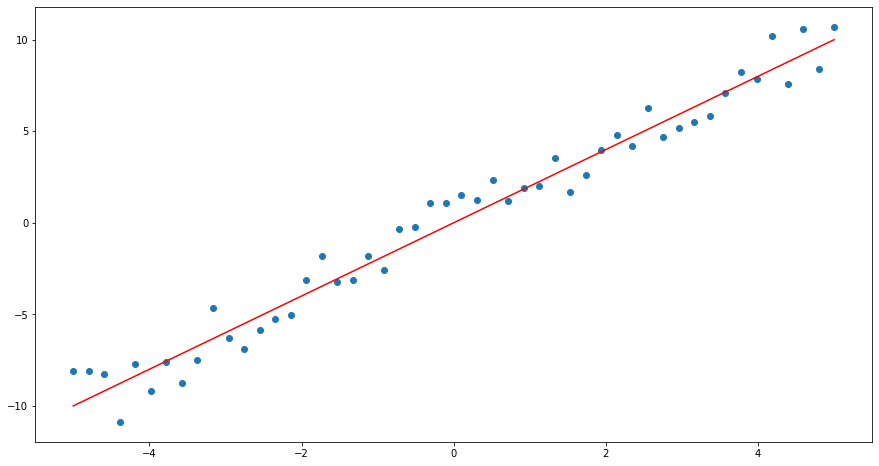

In [205]:
plt.scatter(X,y)
plt.plot(X, 2*X, color='red')

## some aspects of deep learning...
estimating the slope of the red line.
using **gradient descent** on the blue points.

In [206]:
w = pt.empty(1)
w = pt.empty(1, requires_grad=True) # new
w = pt.nn.init.uniform(w,-1,1)
w

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


tensor([0.8294], requires_grad=True)

define a forward function to return an estimate of y from X and w.

In [207]:
def forward(X,y):
    y_pred = X * w
    return y_pred

z = forward(X,w)


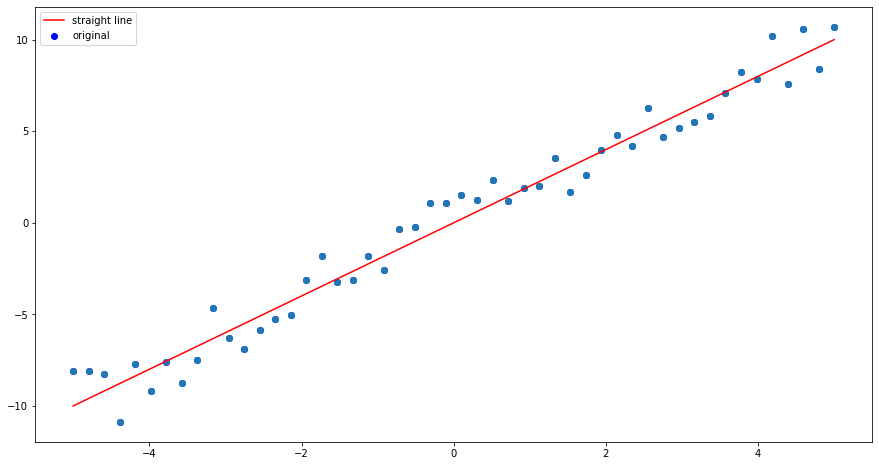

In [208]:
plt.scatter(X,y, label='original', color = 'blue')
plt.plot(X, 2*X, color='red', label = 'straight line')
plt.scatter(X,y)
# plt.scatter(X, z, label='predicted')
plt.legend()

so, how good are our guesses ?
we need a loss function. the mean squared error (of y actual vs y guesses).

In [209]:
def mse(y,y_pred):
    err = y - y_pred
    return pt.mean(err**2)

mse(y, forward(X,w))

tensor(12.8837, grad_fn=<MeanBackward0>)

use gradient descent from pytorch


In [210]:
EPOCHS = 100
LEARNING_RATE = 0.01


In [211]:
for _ in range(EPOCHS):
    y_pred = forward(X,w)
    loss = mse(y, y_pred)

    w.grad = None  # why ?
    loss.backward()  # why ?

    w.data -= LEARNING_RATE * w.grad

w




tensor([1.9956], requires_grad=True)

In [212]:
z = forward(X,w)
z
# z = z[0]
# z

tensor([-9.9781, -9.5708, -9.1636, -8.7563, -8.3490, -7.9417, -7.5345, -7.1272,
        -6.7199, -6.3127, -5.9054, -5.4981, -5.0909, -4.6836, -4.2763, -3.8691,
        -3.4618, -3.0545, -2.6472, -2.2400, -1.8327, -1.4254, -1.0182, -0.6109,
        -0.2036,  0.2036,  0.6109,  1.0182,  1.4254,  1.8327,  2.2400,  2.6472,
         3.0545,  3.4618,  3.8691,  4.2763,  4.6836,  5.0909,  5.4981,  5.9054,
         6.3127,  6.7199,  7.1272,  7.5345,  7.9417,  8.3490,  8.7563,  9.1636,
         9.5708,  9.9781], grad_fn=<MulBackward0>)

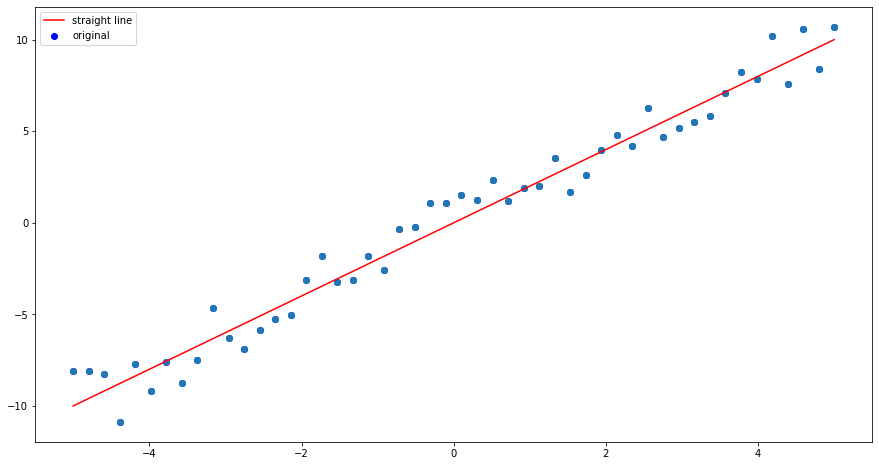

In [213]:
plt.scatter(X,y, label='original', color = 'blue')
plt.plot(X, 2*X, color='red', label = 'straight line')
plt.scatter(X,y)
# plt.scatter(X, z, label='predicted')
plt.legend()

recall from linear algebra pow((pow(X,T)*X, -1)*pow(X,T)*y
[link text](https://www.youtube.com/watch?v=9aBpF0-JH7A&ab_channel=CodingTech)



In [214]:
pt.pow(X.T @ X, -1) * X.T @ y

tensor(1.9956)

In [215]:
class Scalar:
    def __init__(self, val) -> None:
        self.val = float(val)
        self.grad = 0.
        self.backward = lambda: None

    def __add__(self, other):
        result = Scalar(self.val + other.val)
        return result
    def __mul__(self, other):
        result = Scalar(self.val * other.val)
        return result
    def __repr__(self) -> str:
        return f'Value: {self.val}, Gradient: {self.grad}'

Scalar(2) + Scalar(3) * Scalar(5)




Value: 17.0, Gradient: 0.0

create a scalar instance for x = 2.0

In [216]:
x = Scalar(2)
x

Value: 2.0, Gradient: 0.0

define y = x

In [217]:
y = x
y

Value: 2.0, Gradient: 0.0

prepare for a call `backward` on `y`
initialise dy/dx

In [218]:
x.grad = 0.
y.grad = 1.

y.backward()

check that dy/dx = 1.0

In [219]:
x.grad

1.0

implement the backward support.

given y = x+y,  dy/dx=1.0,  dy/dz  =1.0

In [220]:
class Scalar:
    def __init__(self, val) -> None:
        self.val = float(val)
        self.grad = 0.
        self.backward = lambda: None

    def __add__(self, other):
        result = Scalar(self.val + other.val)
        def backward():
            self.grad += result.grad
            other.grad += result.grad
            result.backward = backward
            self.backward()
            other.backward()
        result.backward = backward
        return result
    def __mul__(self, other):
        result = Scalar(self.val * other.val)
        return result
    def __repr__(self) -> str:
        return f'Value: {self.val}, Gradient: {self.grad}'

define y = 3*x for x = 3.0

reminder: 3*x = x + x + x

In [221]:
x = Scalar(3)
y = x + x + x   # y = 3*x

prepare for the backward pass

In [222]:
x.grad = 0.0
y.grad = 1.0

y.backward()


In [223]:
x.grad

3.0

implement the same for multiplication

In [224]:
class Scalar:
    def __init__(self, val) -> None:
        self.val = float(val)
        self.grad = 0.
        self.backward = lambda: None

    def __mul__(self, other):
        result = Scalar(self.val * other.val)
        def backward():
            self.grad += other.val * result.grad
            other.grad += self.val * result.grad
            self.backward()
            other.backward()

        result.backward = backward
        return result

    def __add__(self, other):
        result = Scalar(self.val + other.val)
        def backward():
            self.grad += result.grad
            other.grad += result.grad
            result.backward = backward
            self.backward()
            other.backward()
        result.backward = backward
        return result
        
    def __repr__(self) -> str:
        return f'Value: {self.val}, Gradient: {self.grad}'

use y = x^3 + 2*x for x = 4.0


In [225]:
x = Scalar(4)
y = x * x * x + x + x  # y = 3*x

In [226]:
x.grad = 0.0
y.grad = 1.0
y.backward()


In [227]:
x.grad

50.0

Apply `scalar` to linear regression

In [228]:
w = pt.nn.init.uniform_(w, -1, 1)
w
w = Scalar(w.data.item())
w

Value: -0.5927019119262695, Gradient: 0.0

Make linear regression

In [229]:
X = [Scalar(i * 0.1) for i in range(-50,50)]
X[:5]

[Value: -5.0, Gradient: 0.0,
 Value: -4.9, Gradient: 0.0,
 Value: -4.800000000000001, Gradient: 0.0,
 Value: -4.7, Gradient: 0.0,
 Value: -4.6000000000000005, Gradient: 0.0]

In [230]:
y = [Scalar(2.0) * X[i] for i in range(len(X))]
y[:5]

[Value: -10.0, Gradient: 0.0,
 Value: -9.8, Gradient: 0.0,
 Value: -9.600000000000001, Gradient: 0.0,
 Value: -9.4, Gradient: 0.0,
 Value: -9.200000000000001, Gradient: 0.0]

implement a forward function using w

In [231]:
def forward(X,y):
    y_pred = [w * X[i] for i in range(len(X))]
    return y_pred

forward(X,w)[:5]

[Value: 2.9635095596313477, Gradient: 0.0,
 Value: 2.904239368438721, Gradient: 0.0,
 Value: 2.844969177246094, Gradient: 0.0,
 Value: 2.785698986053467, Gradient: 0.0,
 Value: 2.72642879486084, Gradient: 0.0]

implement the mean squared error

In [233]:
def mse(y,y_pred):
    err = [y[i] + Scalar(-1) * y_pred[i] for i in range(len(y))]
    se = [err[i] * err[i] for i in range(len(err))]
    mse = Scalar(1.0 / len(se)) * sum(se, Scalar(0))
    return mse

mse(y, forward(X,w ))

Value: 56.0287302062246, Gradient: 0.0

confirm that gradiet descent works

In [239]:
for _ in range(EPOCHS):
    y_pred = forward(X,w)
    loss = mse(y ,y_pred)

    w.grad = 0.0  # optimizer.zero_grad() None
    loss.grad = 1.0  # dy/dy = 1 backward() <- sets 1 automatically
    loss.backward()

    w.val -= LEARNING_RATE * w.grad


w






Value: 2.0, Gradient: 0.0

In [240]:
X[:5], y[:5]

([Value: -5.0, Gradient: -308.6440087671485,
  Value: -4.9, Gradient: -302.4711285918054,
  Value: -4.800000000000001, Gradient: -296.2982484164632,
  Value: -4.7, Gradient: -290.1253682411198,
  Value: -4.6000000000000005, Gradient: -283.95248806577655],
 [Value: -10.0, Gradient: -0.7776550425693665,
  Value: -9.8, Gradient: -0.7621019417179794,
  Value: -9.600000000000001, Gradient: -0.7465488408665932,
  Value: -9.4, Gradient: -0.7309957400152047,
  Value: -9.200000000000001, Gradient: -0.7154426391638171])